In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**10.3 Horse Colic Dataset**

In [ ]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('/content/drive/MyDrive/Thu thập và tiền xử lý dữ liệu/Thuyết trình 19 03/horse-colic.csv', header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
  # count number of rows with missing values
  n_miss = dataframe[[i]].isnull().sum()
  perc = n_miss / dataframe.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

**10.4 Iterative Imputation With IterativeImputer** (Phép tính lặp lại với IterativeImputer)

**10.4.1 IterativeImputer Data Transform**(Chuyển đổi dữ liệu IterativeImputer)

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# load dataset
dataframe = read_csv('/content/drive/MyDrive/Thu thập và tiền xử lý dữ liệu/Thuyết trình 19 03/horse-colic.csv', header=None, na_values='?')
# chia thành các yếu tố đầu vào và đầu ra
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# tóm tắt toàn bộ thiếu
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


**10.4.2 IterativeImputer and Model Evaluation** (Đánh giá mô hình)

In [ ]:
# evaluate iterative imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('/content/drive/MyDrive/Thu thập và tiền xử lý dữ liệu/Thuyết trình 19 03/horse-colic.csv'
                     , header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model

scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.868 (0.051)


**10.4.3 IterativeImputer and Different Imputation Order**(thứ tự quy định khác nhau)

>ascending 0.863 (0.053)
>descending 0.868 (0.050)
>roman 0.874 (0.048)
>arabic 0.868 (0.055)
>random 0.872 (0.058)


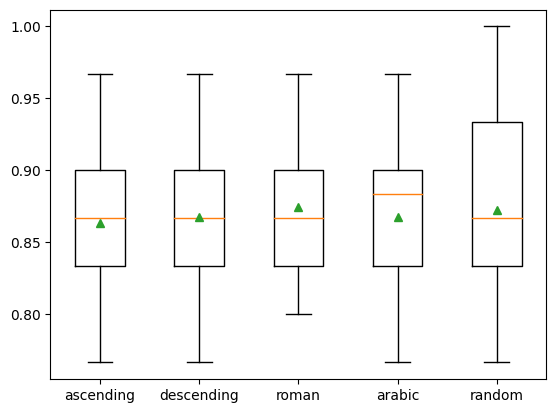

In [ ]:
# compare iterative imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('/content/drive/MyDrive/Thu thập và tiền xử lý dữ liệu/Thuyết trình 19 03/horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m',RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

**10.4.4 Turning max_iter**

>1 0.869 (0.055)
>2 0.867 (0.053)
>3 0.873 (0.050)
>4 0.873 (0.051)
>5 0.871 (0.054)
>6 0.876 (0.050)
>7 0.869 (0.053)
>8 0.867 (0.053)
>9 0.870 (0.050)
>10 0.873 (0.050)
>11 0.874 (0.048)
>12 0.873 (0.054)
>13 0.870 (0.057)
>14 0.867 (0.052)
>15 0.867 (0.046)
>16 0.868 (0.048)
>17 0.874 (0.052)
>18 0.868 (0.055)
>19 0.868 (0.050)
>20 0.868 (0.057)


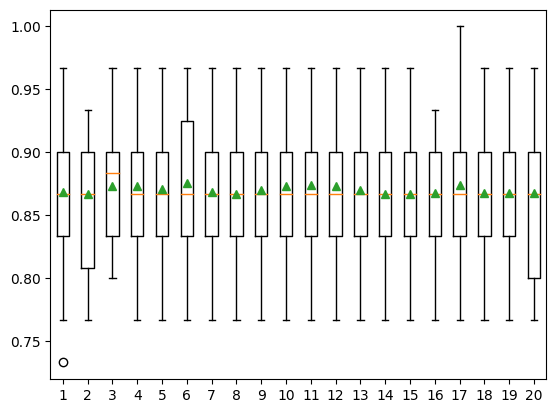

In [ ]:
# compare iterative imputation number of iterations for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('/content/drive/MyDrive/Thu thập và tiền xử lý dữ liệu/Thuyết trình 19 03/horse-colic.csv', header=None, na_values='?')
# split into input and output elements

data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m',
  RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

**10.4.5 IterativeImputer Transform When Making a Prediction** (Transform khi đưa ra dự đoán)

In [ ]:
# iterative imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('/content/drive/MyDrive/Thu thập và tiền xử lý dữ liệu/Thuyết trình 19 03/horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4,
       nan, nan, nan, 3, 5, 45.00,8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
